## Clustering Methods

## Intro
The purpose of this project is to determine how to cluster data. The dataset of choice was "Glass" from the mlbench package. The reason this package was chosen was because of the simplicity of the data. The data consists of 9 variables (elements) and 7 different types of glass. We intend to see if we can accurately determine the different number of clusters in the dataset by using several different techniques.

Initially the model was applied to several different datasets, namely "BreastCancer", "Sonar", and "Cars". However because of way the data was structured and the type of data in those datasets, a clustering model was unsuccessful. 


## Methodology

We will first use graphical approaches to estimate the number of clusters (elbow method). Followed by the hubert index, then KNN and finally use nbclust to see how R, manages to distinguish the different types of glass.

In [1]:
install.packages("factoextra")
install.packages("ISLR")
install.packages("dbscan")
install.packages("NbClust")
install.packages("mlbench")


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dhruv\AppData\Local\Temp\RtmpCkNGQ2\downloaded_packages
package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dhruv\AppData\Local\Temp\RtmpCkNGQ2\downloaded_packages
package 'dbscan' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dhruv\AppData\Local\Temp\RtmpCkNGQ2\downloaded_packages
package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dhruv\AppData\Local\Temp\RtmpCkNGQ2\downloaded_packages
package 'mlbench' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dhruv\AppData\Local\Temp\RtmpCkNGQ2\downloaded_packages


In [3]:
library(ISLR)
library(cluster)
library(dbscan)
library(factoextra)
library(NbClust)
library(fpc)
library(ggplot2)
library(mlbench)
data(BreastCancer)
data(Glass)
data(Sonar)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: 'fpc'

The following object is masked from 'package:dbscan':

    dbscan



In [4]:
head(Glass)
data=Glass

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [33]:
#data$num_class = factor(data$Class)
#data$num_class = as.numeric(data$num_class)

In [34]:
#data$num_class = factor(data$Class)
#data$num_class = as.numeric(data$num_class)

In [35]:
#data$Class = NULL
#data$Id = NULL
#na.omit(data)

In [36]:
#data = as.data.frame(data, row.names = NULL, optional = FALSE)

In [5]:
head(data)
summary(data)
data$Type = as.numeric(data$Type)

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


       RI              Na              Mg              Al       
 Min.   :1.511   Min.   :10.73   Min.   :0.000   Min.   :0.290  
 1st Qu.:1.517   1st Qu.:12.91   1st Qu.:2.115   1st Qu.:1.190  
 Median :1.518   Median :13.30   Median :3.480   Median :1.360  
 Mean   :1.518   Mean   :13.41   Mean   :2.685   Mean   :1.445  
 3rd Qu.:1.519   3rd Qu.:13.82   3rd Qu.:3.600   3rd Qu.:1.630  
 Max.   :1.534   Max.   :17.38   Max.   :4.490   Max.   :3.500  
       Si              K                Ca               Ba       
 Min.   :69.81   Min.   :0.0000   Min.   : 5.430   Min.   :0.000  
 1st Qu.:72.28   1st Qu.:0.1225   1st Qu.: 8.240   1st Qu.:0.000  
 Median :72.79   Median :0.5550   Median : 8.600   Median :0.000  
 Mean   :72.65   Mean   :0.4971   Mean   : 8.957   Mean   :0.175  
 3rd Qu.:73.09   3rd Qu.:0.6100   3rd Qu.: 9.172   3rd Qu.:0.000  
 Max.   :75.41   Max.   :6.2100   Max.   :16.190   Max.   :3.150  
       Fe          Type  
 Min.   :0.00000   1:70  
 1st Qu.:0.00000   2:76 

## Elbow Method
The elbow method uses the fviz nblust package to determine the number of clusters within the dataset.using within clusters sum of squares. We are forcing the x intercept to be at 7, to show what our hypothesis looks visually.

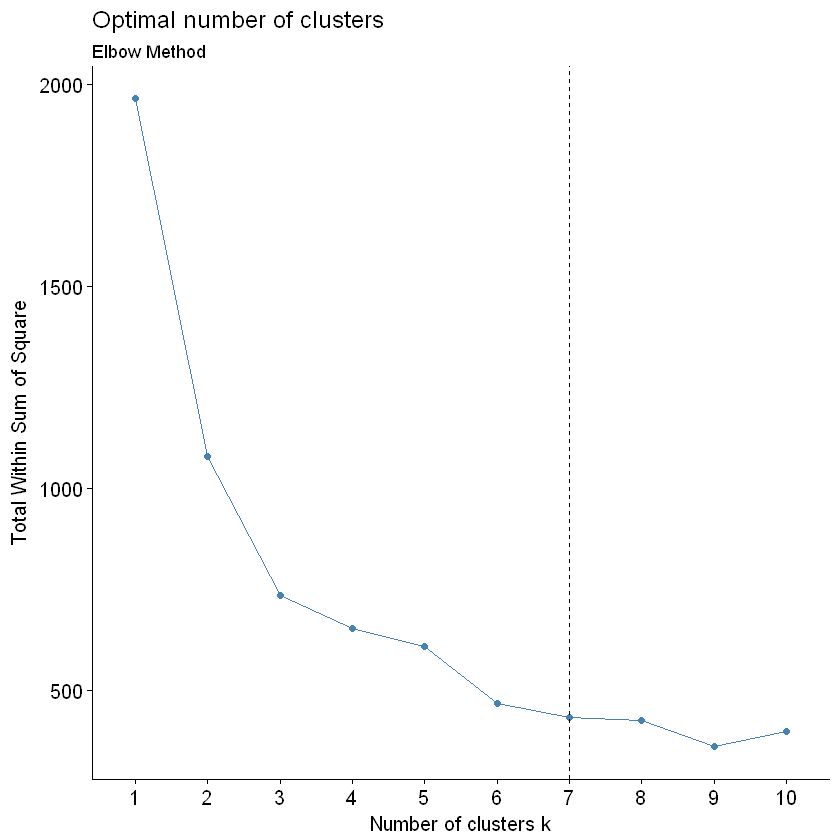

In [6]:
fviz_nbclust(data,kmeans,method = "wss") +
geom_vline(xintercept = 7, linetype = 2) + 
labs(subtitle = "Elbow Method")

Warning message in pf(beale, pp, df2):
"NaNs produced"

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


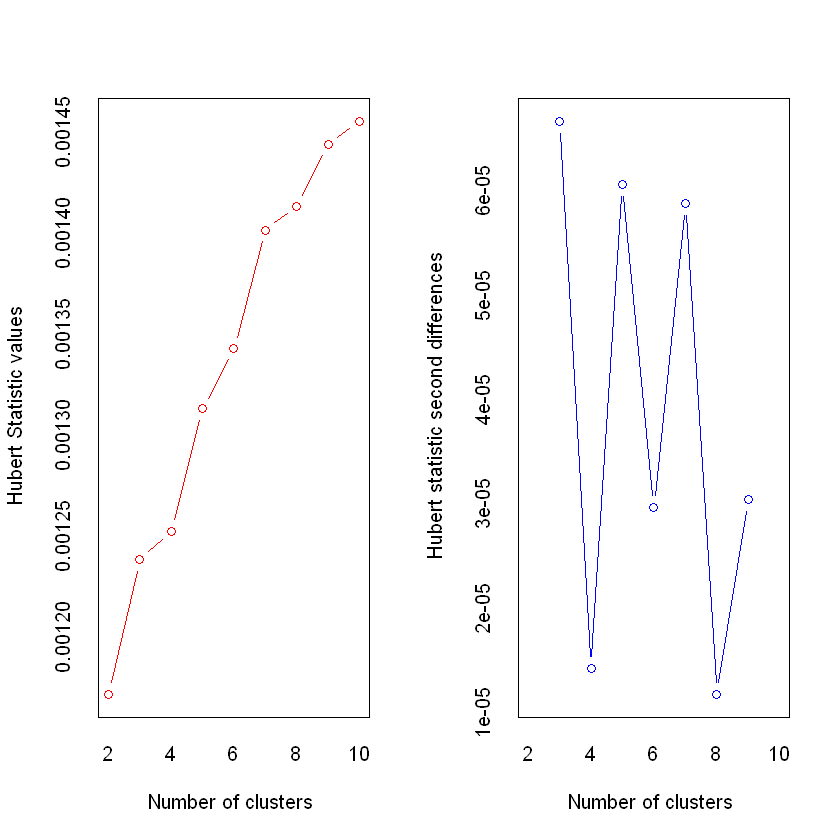

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 6 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 5 proposed 4 as the best number of clusters 
* 2 proposed 6 as the best number of clusters 
* 4 proposed 9 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


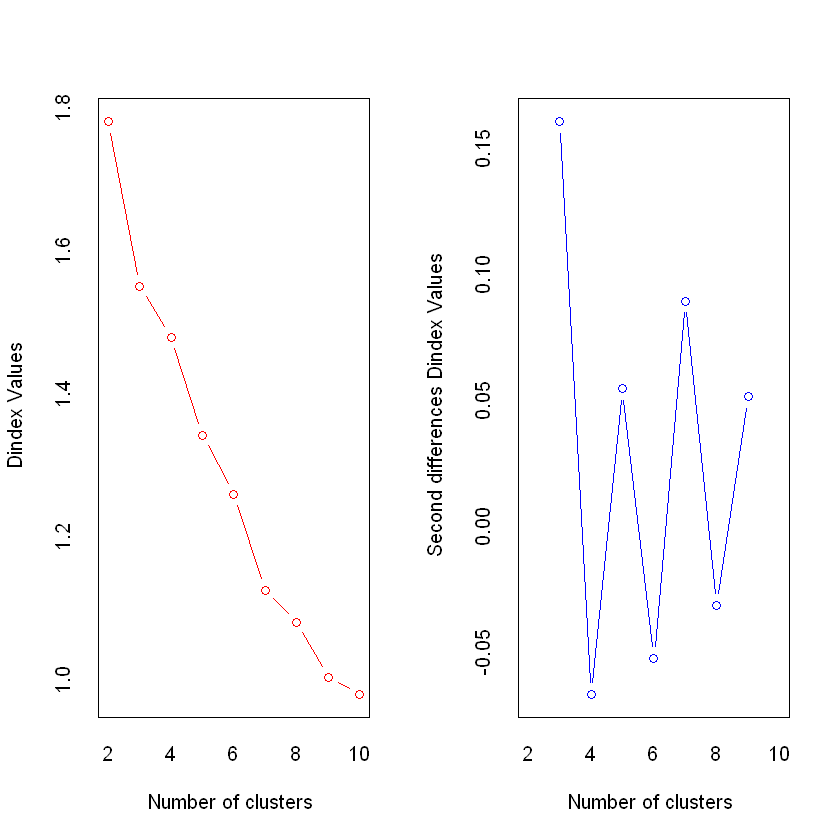

In [7]:
#t(data)%*%as.matrix(data)

nb = NbClust( data, distance = "euclidean", min.nc = 2,
            max.nc = 10, method = "kmean")

nbClust is showing that we use '2' as our number of clusters, however the D index value graph is not showing any real relations. We will futher investigate this method by tweaking the variables.

Warning message in plot.window(...):
""share" is not a graphical parameter"Warning message in plot.window(...):
""Labels" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""share" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""Labels" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""share" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""Labels" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""share" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""Labels" is not a graphical parameter"Warning message in box(...):
""share" is not a graphical parameter"Warning message in box(...):
""Labels" is not a graphical parameter"Warning message in title(...):
""share" is not a graphical parameter"Warning message in title(...):
""Labels" is not a gr

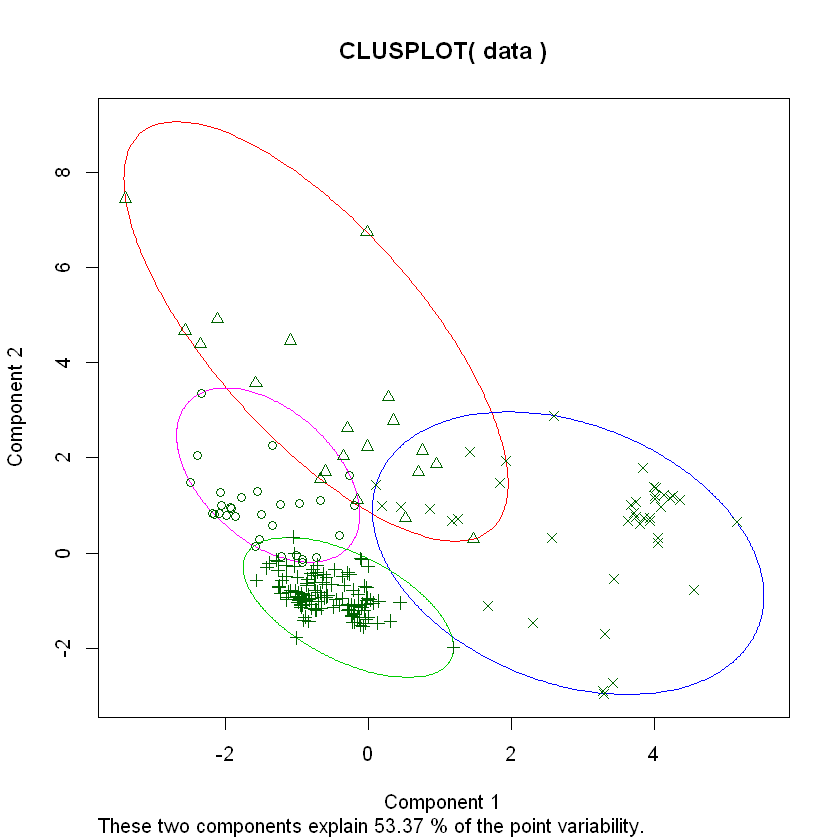

In [23]:
clus = kmeans(data, centers = 4)
clusplot(data, clus$cluster, color = TRUE,
         share = TRUE, Labels = 2, lines =  0)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


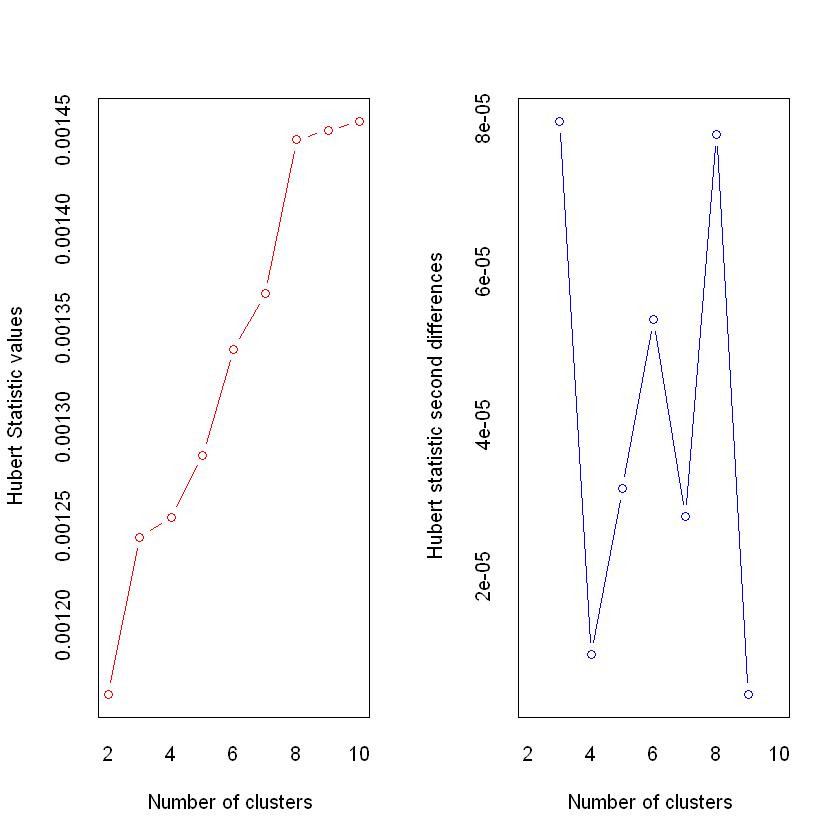

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 7 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 4 proposed 9 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


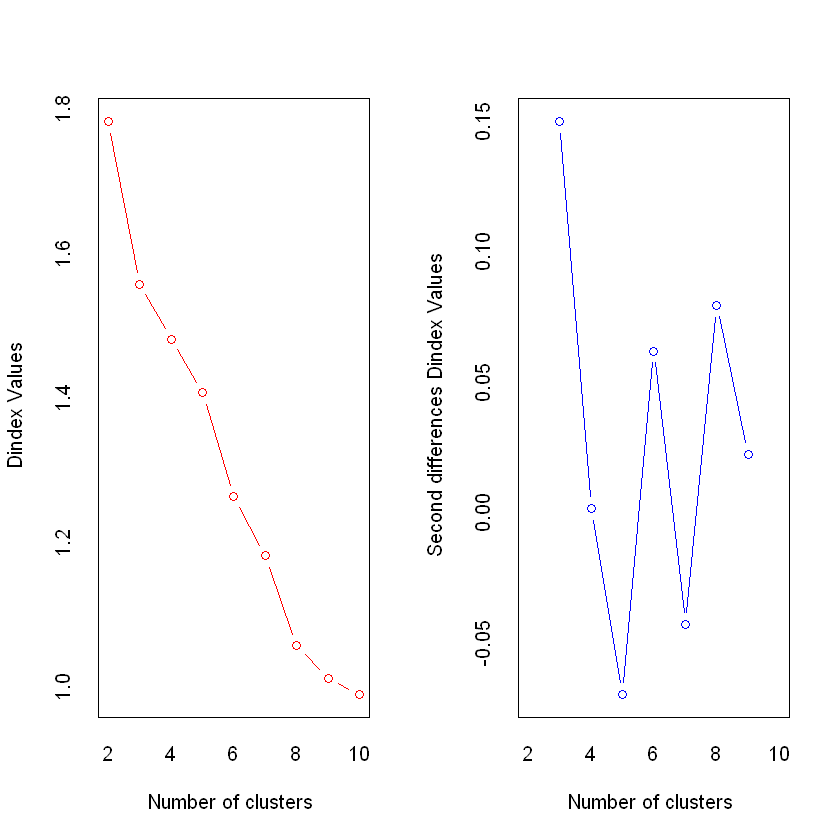

In [9]:
nb1 = NbClust( data, distance = "euclidean", min.nc = 2,
            max.nc = 10, method = "ward.D2")

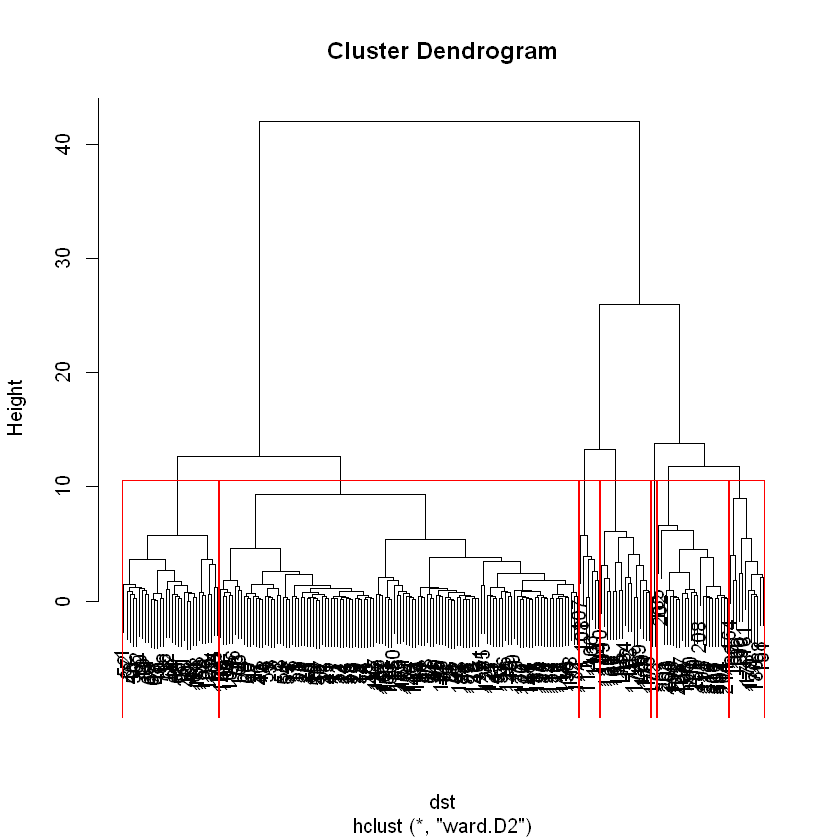

In [10]:
dst = dist(data, method = "euclidean")
fit = hclust(dst, method = "ward.D2")
plot(fit)
groups = cutree(fit, k=7)
rect.hclust(fit, k=7, border = "red")

In [11]:
kNNdist(data, k=7, search = "kd")


,1,2,3,4,5,6,7
1,0.8870195,1.0617912,1.1175436,1.1263658,1.1474323,1.1811442,1.1985842
2,0.4926480,0.5860887,0.7070361,0.7643298,0.8062258,0.8072794,0.8202454
3,0.4926480,0.5272588,0.5294351,0.6431186,0.6919551,0.7449176,0.7945445
4,0.3004996,0.3223353,0.4372645,0.4396590,0.4581528,0.4959839,0.5013981
5,0.1493318,0.2733130,0.3248077,0.3938274,0.4660472,0.4686150,0.5047772
6,0.2925749,0.4339355,0.4985003,0.5359127,0.5492743,0.5507285,0.5620512
7,0.1493318,0.2412468,0.2874022,0.3555278,0.3848377,0.4620606,0.4855926
8,0.2412468,0.3248077,0.4189272,0.4304649,0.4555217,0.4619524,0.4678675
9,0.5877074,0.8106171,0.8202454,0.8233468,0.9054833,0.9820387,0.9891929
10,0.2186324,0.2273774,0.2489980,0.2507989,0.2874022,0.2978255,0.3011644


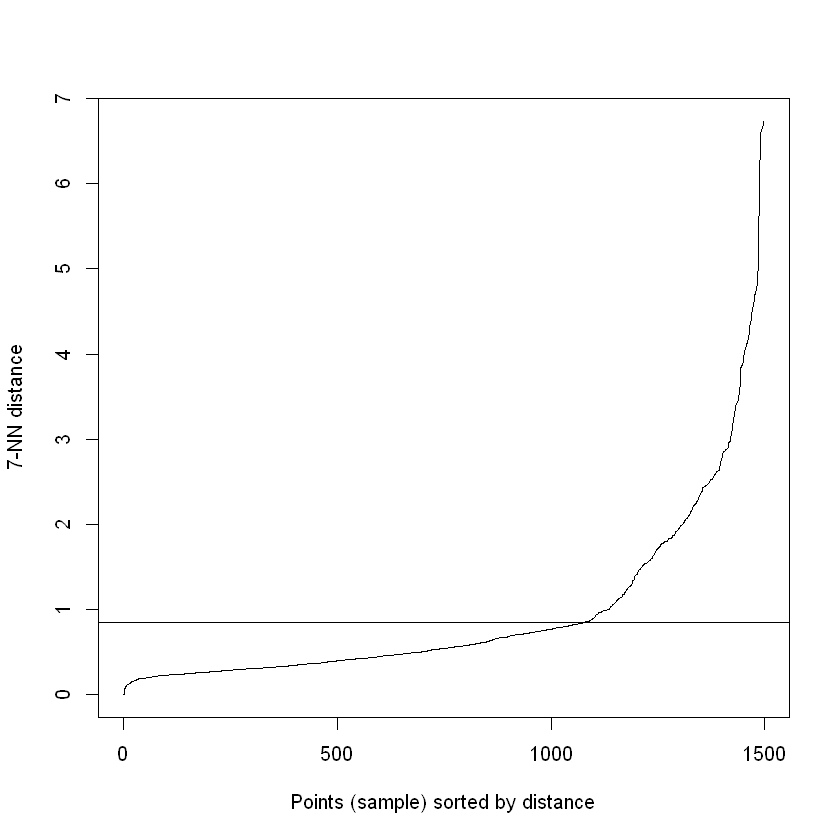

In [20]:
kNNdistplot(data, k=7)
abline(h=.85)

In [21]:
db1 = dbscan(data, eps = .85)
#fviz_cluster(db1, data, )

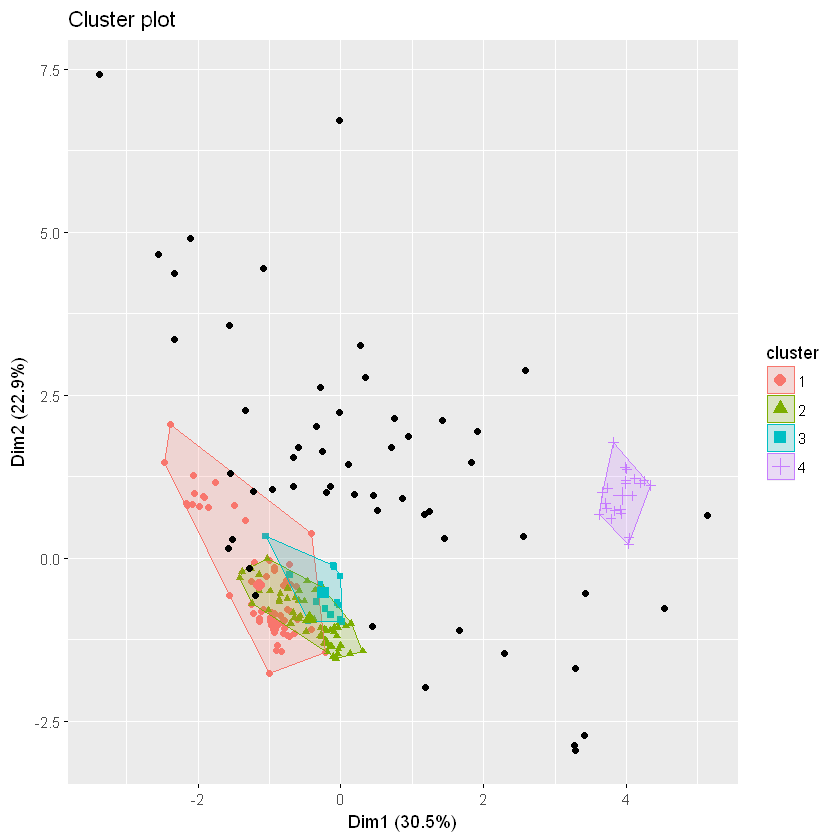

In [22]:
fviz_cluster(db1, data, choose.vars = NULL, stand = TRUE,
  axes = c(1, 2), geom = c("point"), repel = FALSE,
  show.clust.cent = TRUE, ellipse = TRUE, ellipse.type = "convex",
  ellipse.level = 0.95, ellipse.alpha = 0.2, shape = NULL,
  pointsize = 1.5, labelsize = 12, main = "Cluster plot", outlier.color = "black", outlier.shape = 19)

## Conclusion

Our initial hypothesis was that there are 7 different types of glass wihtin the dataset, however based on the clustering we have performed we can say that the "elements" or variables only account for 4 of the different types of glass. This means that the other 3 glasses in the dataset are so similar in their element composition that the clustering packages used in our research could not tell them apart. 

